### Exploratory Data Analysis

In [1]:
# For data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

#For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df0 = pd.read_csv(r"D:\Documents\Github\credit_risk_predictor\data\cleaned_data.csv")
df0.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,Marketing,10,RENT,1.202703,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,1.089146,1990-06-01,16.0,0.0,1.434536,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4,MORTGAGE,0.060161,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,0.623256,2004-07-01,17.0,0.0,0.681703,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,B3,Statistician,0,RENT,-0.796125,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,-0.513208,2007-08-01,13.0,0.0,0.079328,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6,RENT,-0.319423,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,-2.120210,2006-09-01,6.0,0.0,-0.739714,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9,MORTGAGE,-0.281432,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,1.893119,1999-03-01,13.0,0.0,0.927930,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df0.shape

(346339, 27)

In [3]:
# for columns with <=35 unique values, converting them to category dtype 

cat_cols = {'term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','initial_list_status',
            'application_type', 'pub_rec', 'mort_acc', 'pub_rec_bankruptcies'}
for col in cat_cols:
    df0[col] = df0[col].astype('category')

# converting issue date and earliest credit line columns into datetime
df0['issue_d'] = pd.to_datetime(df0['issue_d'])
df0['earliest_cr_line'] = pd.to_datetime(df0['earliest_cr_line'])


In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346339 entries, 0 to 346338
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             346339 non-null  float64       
 1   term                  346339 non-null  category      
 2   int_rate              346339 non-null  float64       
 3   installment           346339 non-null  float64       
 4   grade                 346339 non-null  category      
 5   sub_grade             346339 non-null  category      
 6   emp_title             346339 non-null  object        
 7   emp_length            346339 non-null  category      
 8   home_ownership        346339 non-null  category      
 9   annual_inc            346339 non-null  float64       
 10  verification_status   346339 non-null  category      
 11  issue_d               346339 non-null  datetime64[ns]
 12  loan_status           346339 non-null  category      
 13 

##### Univariate Analysis

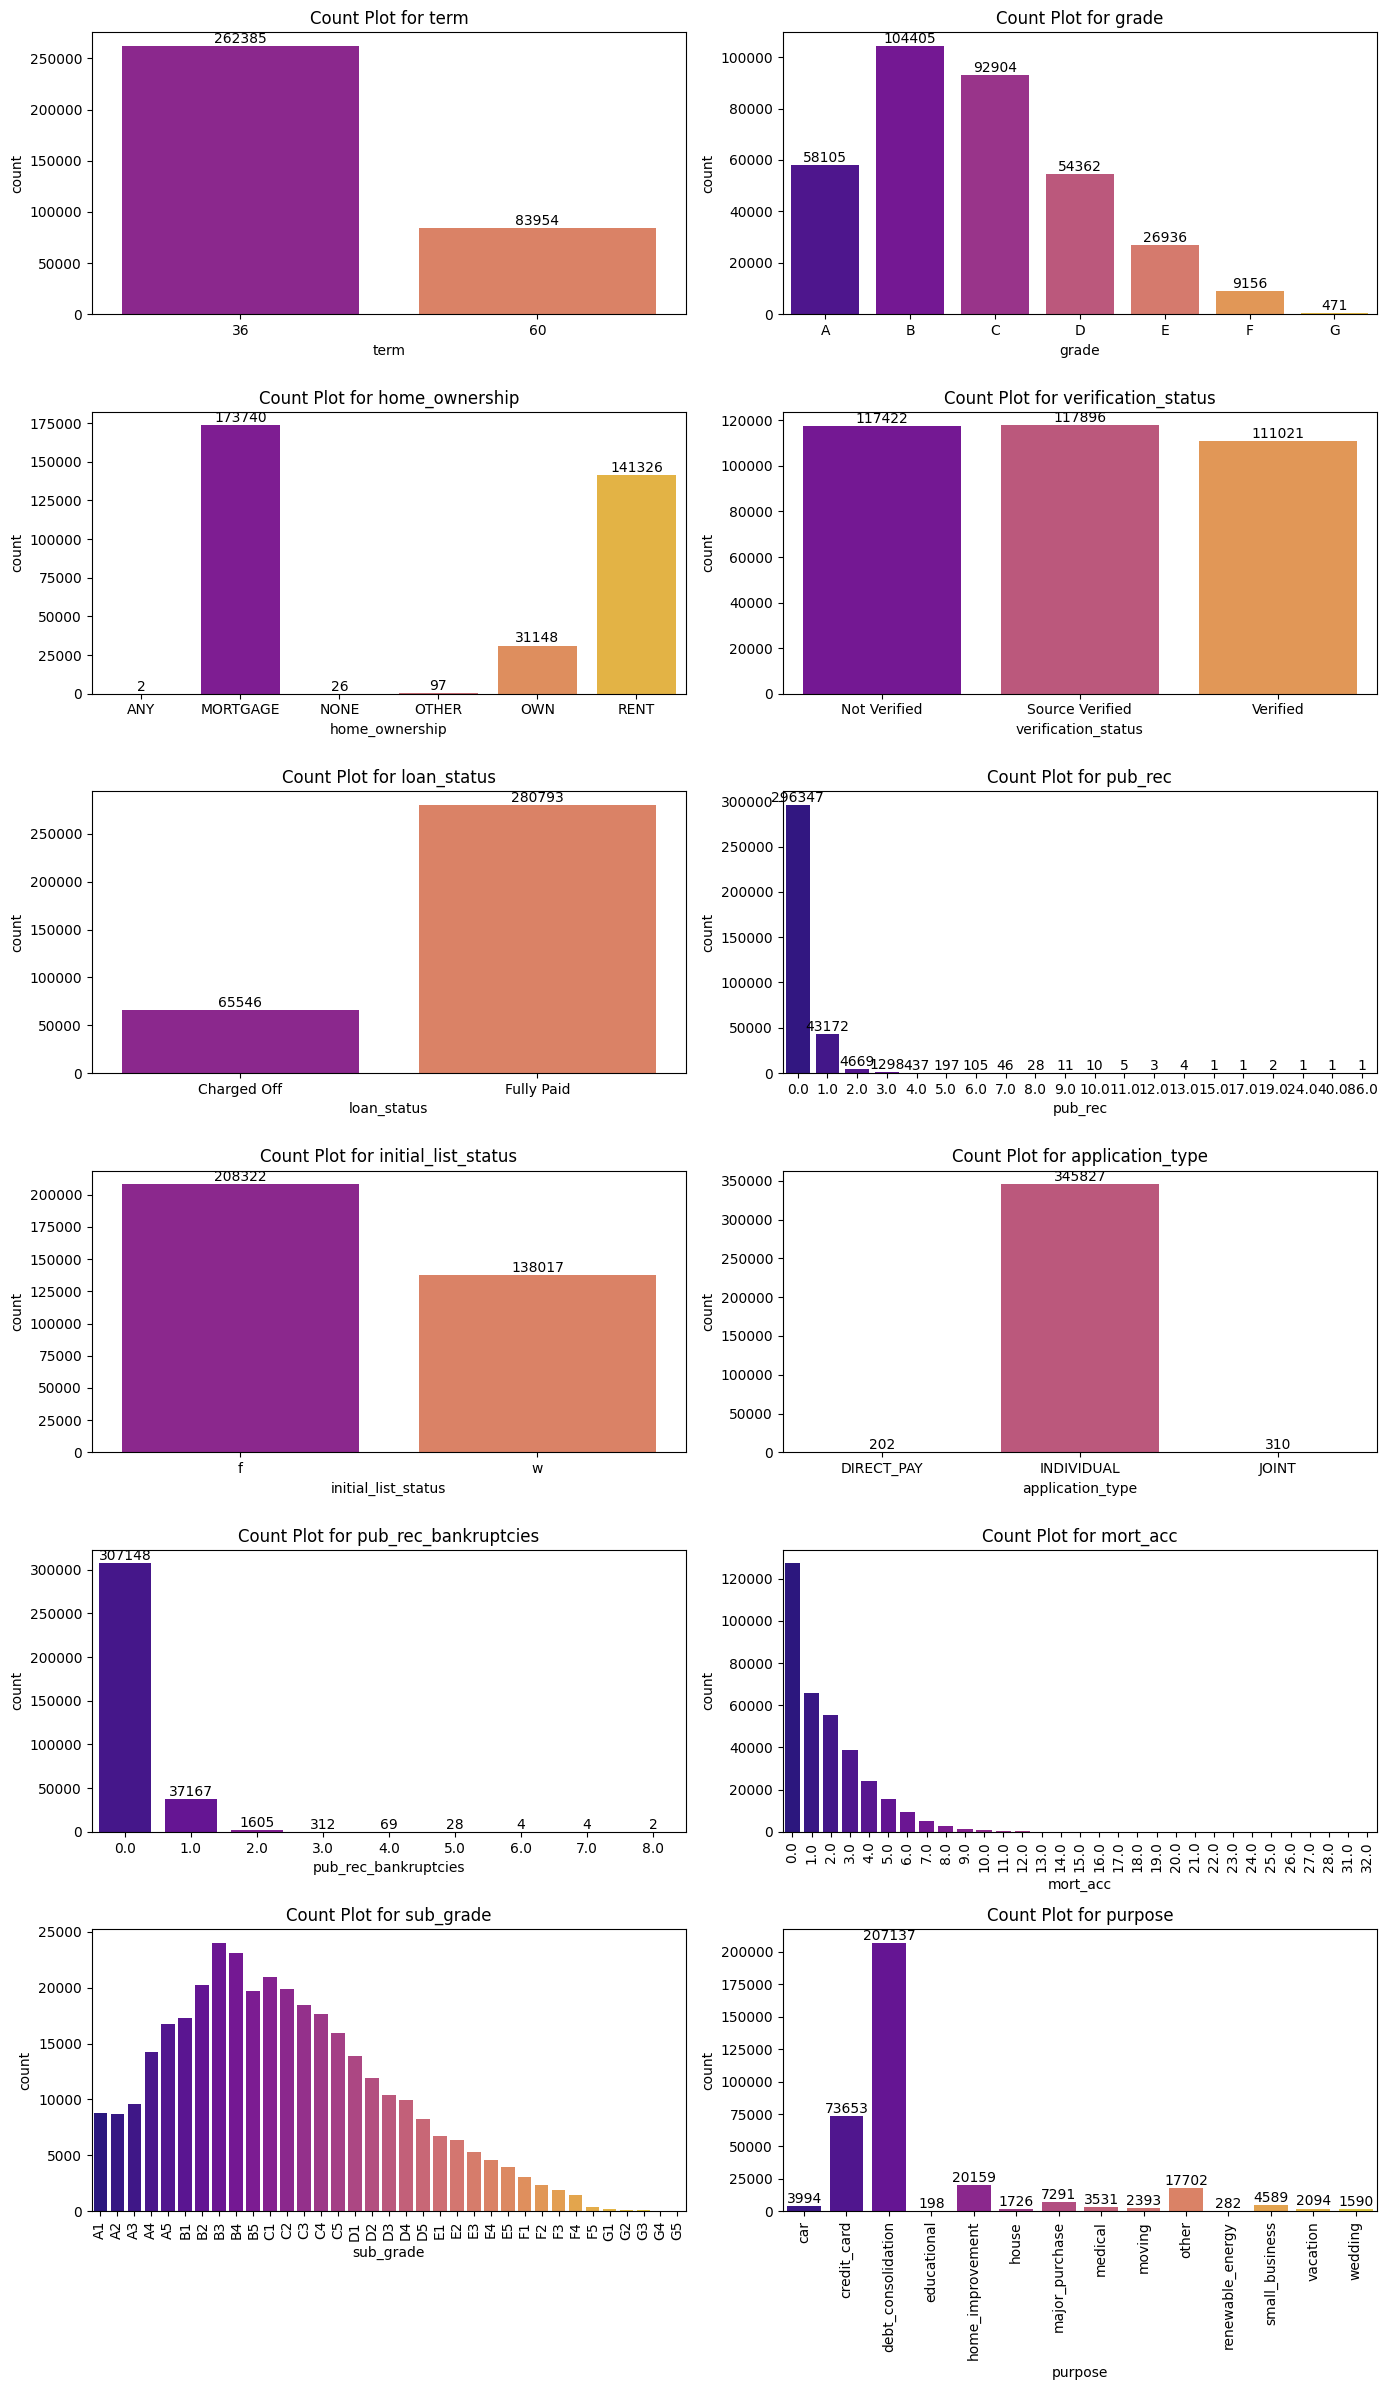

In [8]:
# Countplots for categorical values

cols = ['term', 'grade', 'home_ownership', 'verification_status',
       'loan_status', 'pub_rec', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies']
plt.figure(figsize=(14,24))
i = 1
for col in cols:
  plt.subplot(6,2,i)
  ax = sns.countplot(x=df0[col], palette='plasma')
  for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=0.01)
  plt.title(f'Count Plot for {col}')
  i += 1
  
cols = ['mort_acc', 'sub_grade', 'purpose']
i = 10
for col in cols:    
    plt.subplot(6,2,i)
    ax = sns.countplot(x=df0[col], palette = 'plasma')
    if col == 'purpose':
      for container in ax.containers:
          ax.bar_label(container, fmt='%.0f', padding=0.01)
    else: pass
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation = 90)
    i+=1

plt.tight_layout()
plt.show()
  

Insights:

1. Almost 80% loans are of 36 months term
2. Maximum loans (30%) fall in B grade, followed by C,A & D respectively
3. The type of home ownership for 50% cases is mortgage
4. The target variable (loan status) is imbalanced in the favour of fully-paid loans. Defaulters are approx 25% of fully paid instances.
5. 85% of applicants don't have a public record/haven't filled for bankruptcy
6. 99% applicants have applied under 'individual' application type
7. 55% of loans are taken for the purpose of debt consolidation followed by 20% on credit card

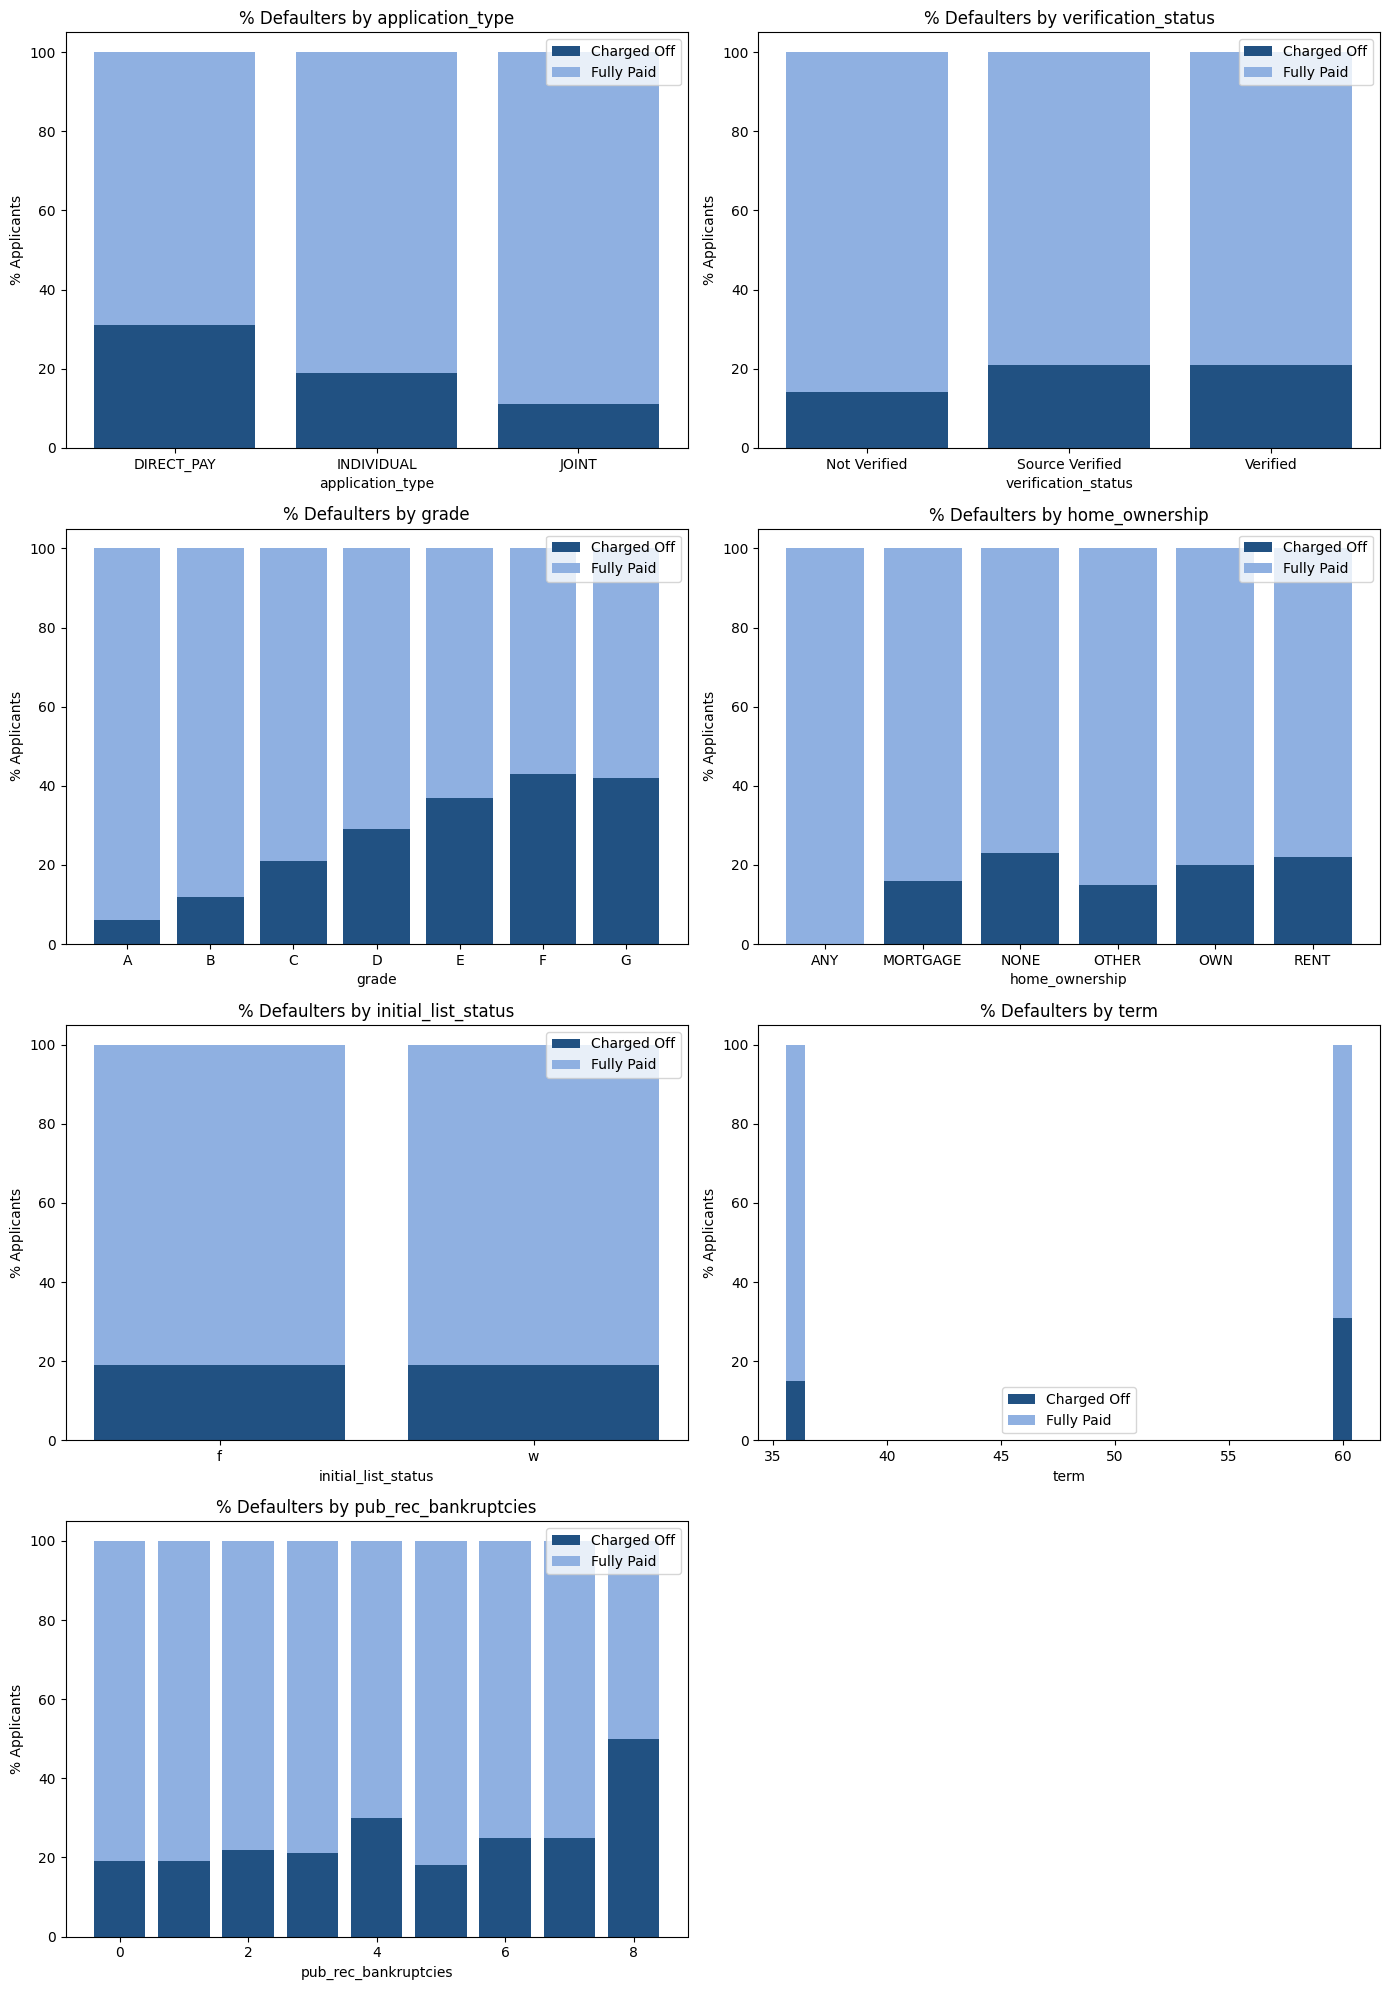

In [15]:
# Checking how much categorical target variable 'loan_status' depends on different predictor variables

cols = ['application_type', 'verification_status', 'grade',
        'home_ownership', 'initial_list_status', 'term',
        'pub_rec_bankruptcies']

plt.figure(figsize=(14,20))
count=1
for col in cols:
  ax=plt.subplot(4,2,count)

  data = df0.pivot_table(index=col, columns='loan_status', aggfunc='count', values='purpose')
  data = data.div(data.sum(axis=1), axis=0).multiply(100).round()
  data.reset_index(inplace=True)

  plt.bar(data[col],data['Charged Off'], color='#215182')
  plt.bar(data[col],data['Fully Paid'], color='#8FB0E1', bottom=data['Charged Off'])
  plt.xlabel(f'{col}')
  plt.ylabel('% Applicants')
  plt.title(f'% Defaulters by {col}')
  plt.legend(['Charged Off','Fully Paid'])
  count += 1

plt.tight_layout()
plt.show()

Insights:

1. The incidence of defaulters significantly rises for extended loan terms, particularly evident in the 60-month category.

2. As anticipated, the grade play a pivotal role in determining loan_status, with the highest grade exhibiting the highest proportion of defaulters.

4. Removal of features like initial_list_status and state is recommended, as they demonstrate negligible impact on loan_status. Surprisingly, public records also show no discernible influence on loan_status.

5. The direct pay application type exhibits a notably higher default rate when compared to individual or joint applications, emphasizing the significance of application type in predicting defaults.

6. Loans designated for small business purposes exhibit the highest default rate, signifying a potential area of concern that may require further investigation or targeted risk mitigation strategies.

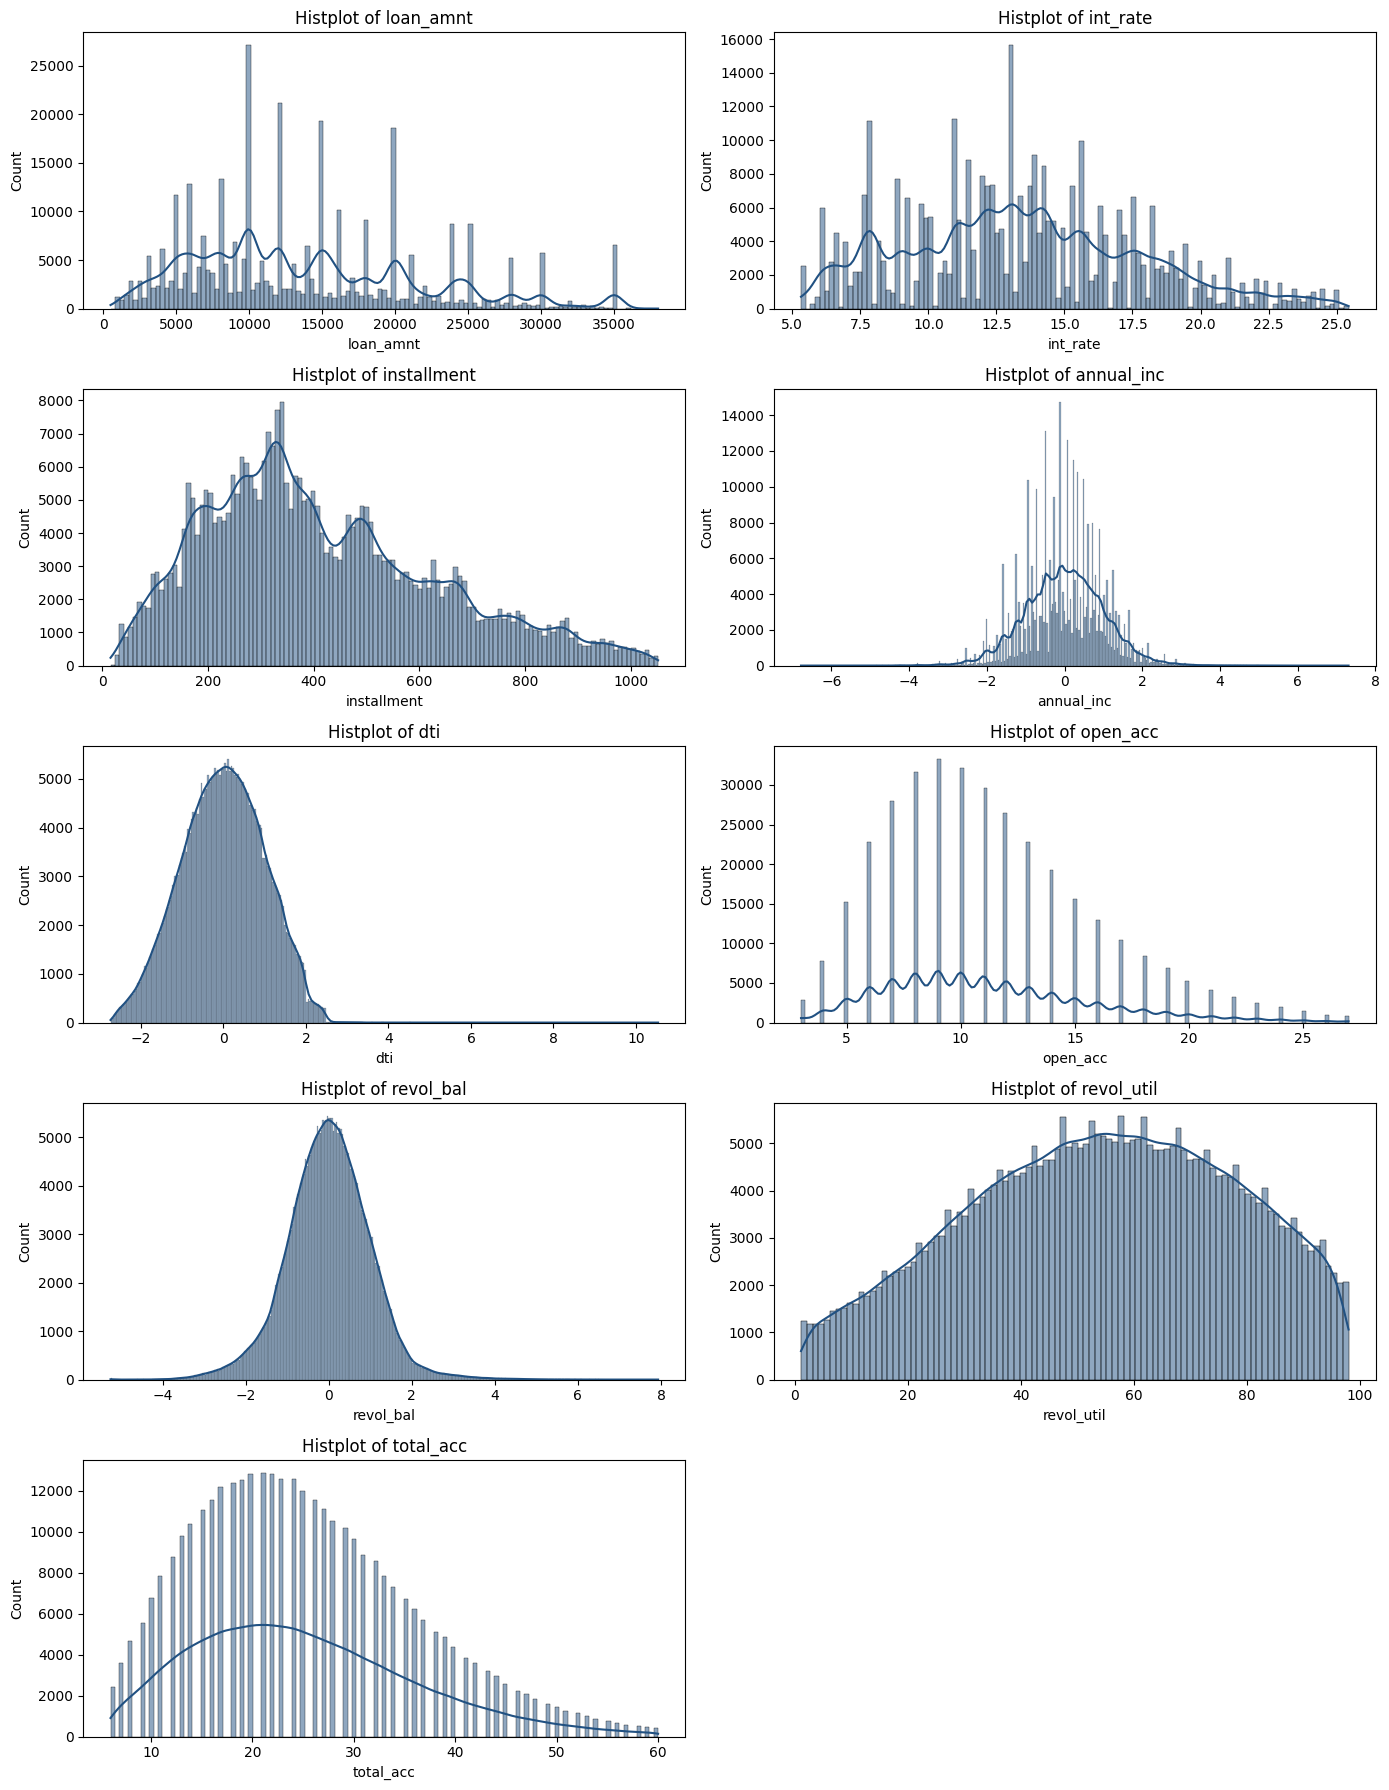

In [ ]:
# Histograms of numerical columns

num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc']

fig = plt.figure(figsize=(14,18))
i=1

for col in num_cols:
       
       ax = plt.subplot(5, 2, i)
       sns.histplot(x = df0[col], kde=True, color='#215182')
       plt.title(f"Histplot of {col}")
       i+=1
       
plt.tight_layout()       
plt.show()

Insights from the Histograms:

1. The distribution is right-skewed with peaks at common loan amounts (e.g., 10K, 15K, 20K, etc.), likely due to lender-set loan brackets.
2. The distribution is spread out, with higher density around 10-15%.
Some borrowers pay much higher interest rates, possibly indicating higher-risk borrowers.
3. Shows a bimodal distribution, suggesting loan repayments cluster around specific installment amounts.
4. Almost normal distribution, but appears to have some extreme values.
Potentially outliers in high-income borrowers should be examined.
5. Slight right skew, meaning a majority of borrowers have manageable debt levels, but some have high DTI ratios, indicating financial strain.
6. Right-skewed, with most borrowers having 5-15 open accounts.
A long tail suggests some borrowers hold significantly more open accounts.
7. Bell-shaped distribution indicates a balanced mix of borrowers with different revolving balances.
8. Uniform-like distribution, with a concentration around 30-80% utilization.
Borrowers with very high utilization (80-100%) may indicate financial distress.
9. Right-skewed, with most borrowers having 10-30 total accounts, but some have over 50-60 accounts.
Borrowers with many accounts might be experienced in credit handling but could also be at risk of overleveraging.

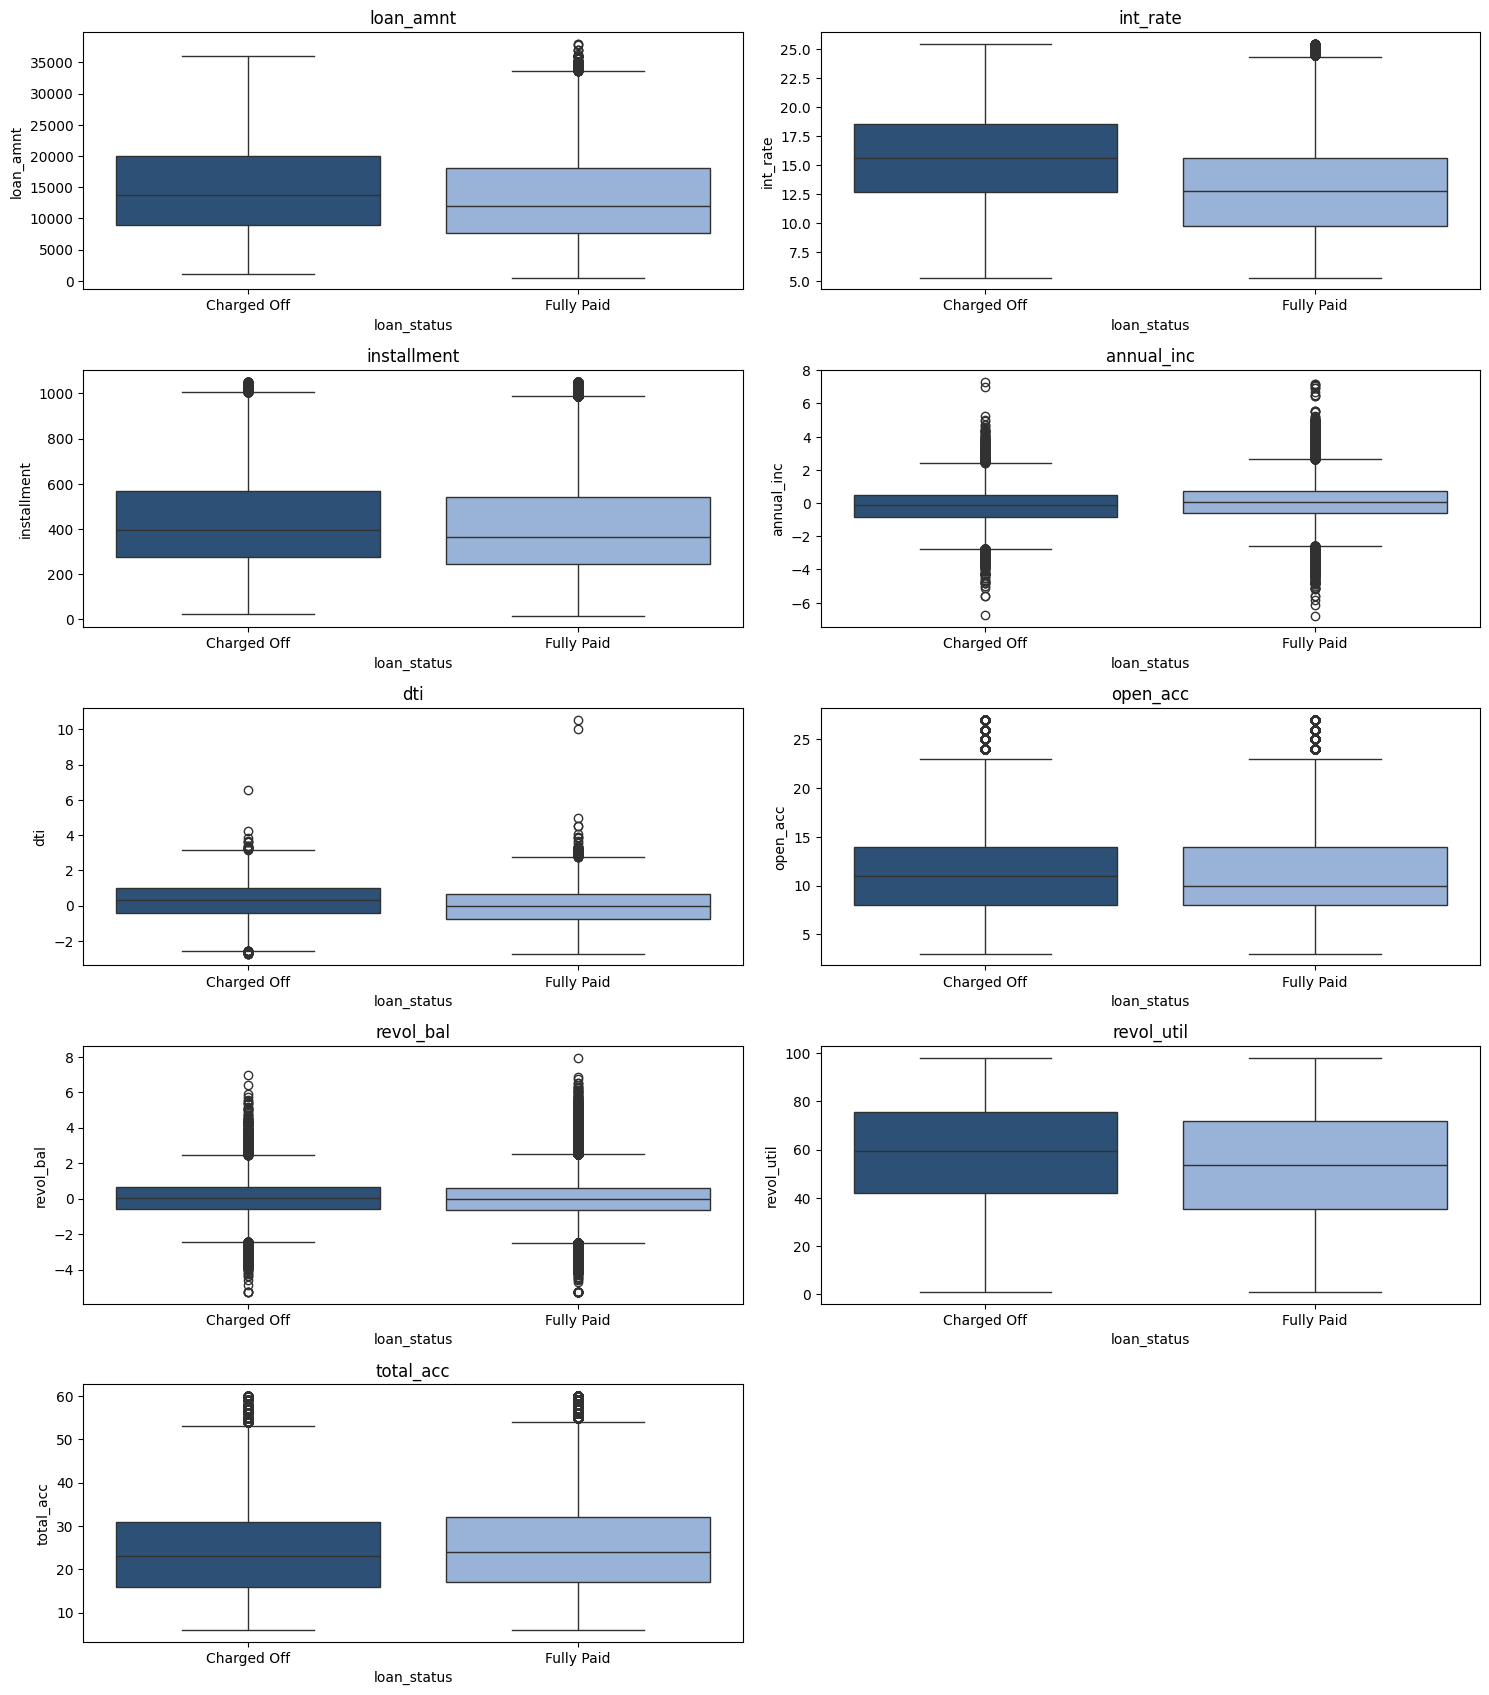

In [ ]:
# Boxplot comparisons based on loan_status classes

plt.figure(figsize=(15,20))
i=1
for col in num_cols:
    ax = plt.subplot(6,2,i)
    sns.boxplot(data=df0, y=col, x='loan_status',palette=('#215182', '#8FB0E1'))
    plt.ylabel(col)
    plt.title(col)
    i += 1

plt.tight_layout()
plt.show()

In [ ]:
# Checking individual categories of the 'grade' column against 'loan_status' values 
 
np.round(pd.crosstab(df0['grade'], df0['loan_status'], normalize='index')*100,2)

loan_status,Charged Off,Fully Paid
grade,,
A,6.07,93.93
B,12.25,87.75
C,20.94,79.06
D,28.63,71.37
E,37.49,62.51
F,42.80,57.20
G,42.04,57.96


In [12]:
# Checking individual categories of the 'sub_grade' column against 'loan_status' values 

np.round(pd.crosstab(df0['sub_grade'], df0['loan_status'], normalize='index')*100,2)

loan_status,Charged Off,Fully Paid
sub_grade,,
A1,2.67,97.33
A2,4.58,95.42
A3,5.50,94.50
A4,6.87,93.13
A5,8.28,91.72
B1,9.55,90.45
B2,10.58,89.42
B3,12.06,87.94
B4,13.55,86.45


In [16]:
# Checking individual categories of the 'sub_grade' column against 'loan_status' values 

np.round(pd.crosstab(df0['purpose'], df0['loan_status'], normalize='index')*100,2)

loan_status,Charged Off,Fully Paid
purpose,,
car,12.82,87.18
credit_card,16.08,83.92
debt_consolidation,20.08,79.92
educational,15.15,84.85
home_improvement,16.42,83.58
house,18.95,81.05
major_purchase,15.81,84.19
medical,20.33,79.67
moving,22.19,77.81
